In [29]:
import numpy as np
import matplotlib.pyplot as plt
# import corner
from emcee.backends import HDFBackend
import emcee
import warnings
import os

In [40]:
ls

Only_M_10000.hdf


In [41]:
current_dir = '/Users/luna/Desktop/Cosmo/EMRIS/Catalogues/Explore/mcmc_result'
os.chdir(current_dir)
reader = HDFBackend("Only_M_10000.hdf",read_only = True)   #Yr_long_6_param_Y0_SNR_60_strong_field

# 1 Dimension

In [42]:
ndim = 1
burnin = 600
end = -1
samples = reader.get_chain(flat = False)[burnin:end].reshape(-1,ndim)

M_samps = samples[:,0]
# mu_samps = samples[:,1]
# a_samps = samples[:,2]
# p0_samps = samples[:,3]
# e0_samps = samples[:,4]
# iota0_samps = samples[:,5]

collected_samps = [M_samps]#, mu_samps, a_samps, p0_samps,e0_samps,iota0_samps]
print('length of samples',len(collected_samps[0]))

length of samples 9160


1sigma deviation 0.02019472481715308


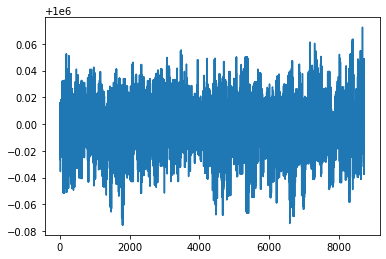

In [37]:
j = 0
plt.plot(collected_samps[j])
print("1sigma deviation",np.std(collected_samps[j]))

In [38]:
# ndim = 10
# burnin = 0 #60
# end = -1
samples = reader.get_chain(flat = False)[burnin:end].reshape(-1,ndim)

M_samps = samples[:,0]
# mu_samps = samples[:,1]
# a_samps = samples[:,2]
# p0_samps = samples[:,3]
# e0_samps = samples[:,4]
# Y0_samps = samples[:,5]
# D_samps = samples[:,6]

# Phi0_phi0_samps = samples[:,7]
# Phi0_theta0_samps = samples[:,8]
# Phi0_r0_samps = samples[:,9]

collected_samps = [M_samps]#, mu_samps, a_samps, p0_samps,e0_samps,Y0_samps, D_samps,Phi0_phi0_samps, Phi0_theta0_samps, Phi0_r0_samps]
print('length of samples',len(collected_samps[0]))

length of samples 8740


0.02019472481715308


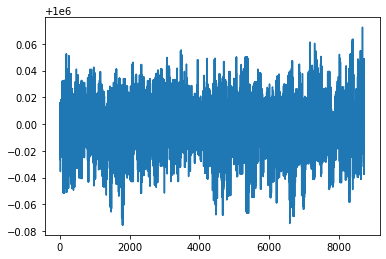

In [39]:
j = 0
plt.plot(collected_samps[j])
print(np.std(collected_samps[j]))

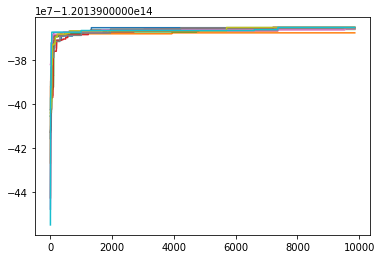

In [24]:
log_prob = reader.get_log_prob(flat = False)
plt.plot(log_prob)


In [11]:
# Precision
params =[r"M", r"$\mu$", r"$a$", r"$p_{0}$", r"$e_{0}$", r"$\iota_{0}$", r"$D$", r"$\Phi_{\phi}$",  
         r"$\Phi_{\theta}$", r"$\Phi_{r}$"] 
N_params = 1#len(params)
one_sigma_deviation = np.array([np.std(collected_samps[j]) for j in range(N_params)])

for j in range(0,N_params):
    print("Delta ", params[j], ': ', one_sigma_deviation[j])

Delta  M :  0.04251085802666186


In [52]:
collected_samps

[array([1000000.00757337, 1000000.09192021, 1000000.19516393, ...,
        1000000.27070687, 1000000.31774891, 1000000.28455099])]

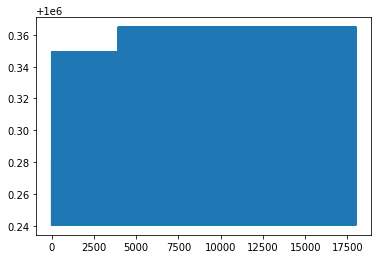

In [15]:
plt.plot(collected_samps[0])

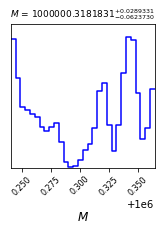

In [17]:
# Corner plot
# os.chdir(plot_directory)
params =[r"$M$", r"$\mu$", r"$a$", r"$p_{0}$", r"$e_{0}$", r"$\iota_{0}$", r"$D$", r"$\Phi_{\phi}$",  
         r"$\Phi_{\theta}$", r"$\Phi_{r}$"] 
N_params = 1#len(params)

import corner
samples = np.column_stack(collected_samps)
figure = corner.corner(samples,bins = 30, color = 'blue',plot_datapoints=False,smooth1d=True,
                       labels=params, 
                       label_kwargs = {"fontsize":12},set_xlabel = {'fontsize': 20},
                       show_titles=True, title_fmt='.7f',title_kwargs={"fontsize": 9},smooth = True)

axes = np.array(figure.axes).reshape((N_params, N_params))
true_vals = [1e6,10,0.9,8.1,0.1, 1, 1, 2, 3, 1.5]
for i in range(N_params):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="r")
    
for yi in range(N_params):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="r")
        ax.axvline(true_vals[xi],color= "r")
        ax.plot(true_vals[xi], true_vals[yi], "sr")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=8)
plt.show()


In [45]:
ls

Yr_long_10_params_SNR_30_strong_field
Yr_long_9_params_SNR_30_strong_field_w_noise
